In [1]:
from typing import Union
import os
import random
from matplotlib import pyplot as plt
from einops import rearrange
import PIL
from torchvision.transforms.functional import pil_to_tensor
from torchvision.transforms import Grayscale
import torch
from src.dataset.vitonhd import VITONHDDataset
from src.utils import get_project_root

PROJECT_ROOT_PATH = get_project_root()

/home/hosjiu/workspace/heatmob/vto-engine/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# from pathlib import Path


# data_rootpath = os.path.join(PROJECT_ROOT_PATH, 'datasets', 'vitonhd', 'train')
# img_dir = Path(data_rootpath, 'image')
# [Path(img_dir, im_name) for im_name in os.listdir(img_paths)]
# # print([f for f in img_paths.glob('*.png')])

In [3]:
data_path = os.path.join(PROJECT_ROOT_PATH, 'datasets', 'vitonhd')
dataset = VITONHDDataset(data_path)

In [4]:
dataset_len = len(dataset)
rand_idx = random.randint(0, dataset_len - 1)
rand_sample = dataset[rand_idx]

In [5]:
rand_sample.keys()

dict_keys(['original_image', 'image', 'masked_image', 'mask', 'densepose', 'cloth'])

In [6]:
def show(img: Union[torch.Tensor, PIL.Image.Image], print_shape: bool = False):
    if isinstance(img, PIL.Image.Image):
        img = pil_to_tensor(img)

    if img.ndim == 3:
        img = rearrange(img, 'c h w -> h w c')
    else:
        raise ValueError('Only support for RGB image for now.')

    if print_shape:
        print(img.shape)

    plt.imshow(img)

torch.Size([1024, 768, 3])


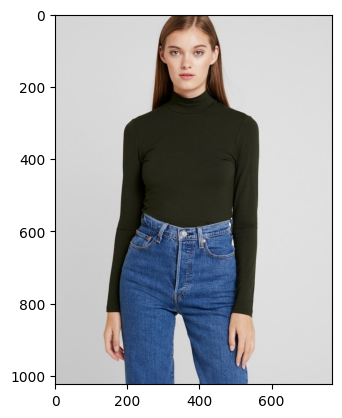

In [7]:
show(rand_sample['original_image'], print_shape=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1024, 768, 3])


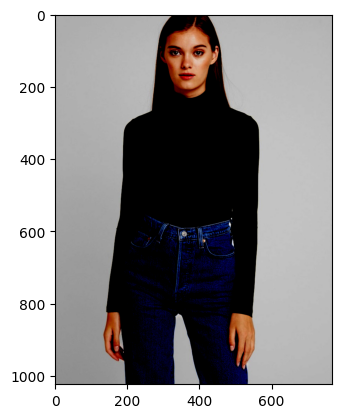

In [8]:
show(rand_sample['image'], print_shape=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1024, 768, 3])


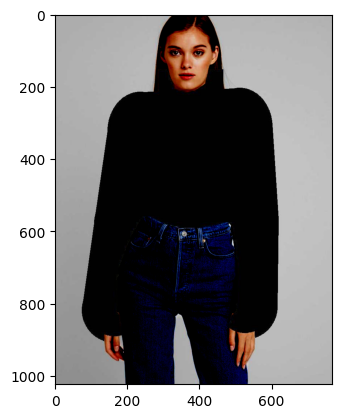

In [9]:
show(rand_sample['masked_image'], print_shape=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1024, 768, 3])


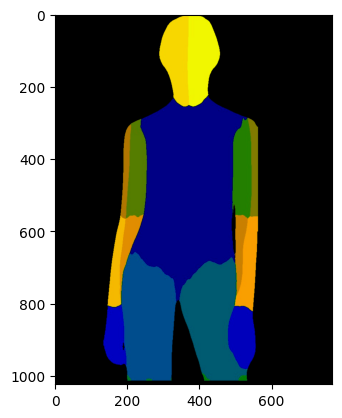

In [10]:
show(rand_sample['densepose'], print_shape=True)

torch.Size([1024, 768, 1])


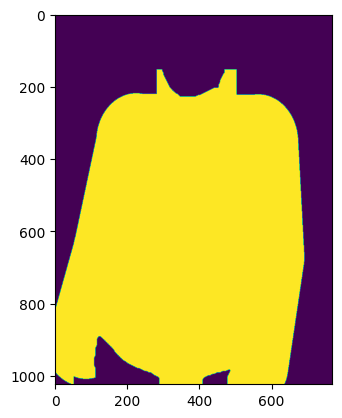

In [ ]:
# This image is actually binary image but
# we converted it from PIL Image to Pytorch Tensor
# so the color space is not white-black one
show(rand_sample['mask'], print_shape=True)